# IE313 - Time Series Analysis - Problem Sets 1

## Load library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
import seaborn as sns
from scipy import stats

## Read the data

In [2]:
df = pd.read_table("./wages.dat", usecols=["wages"])

In [3]:
df["time"] = pd.date_range(start="1981-07", end="1987-06", freq="MS")

In [4]:
df

,wages,time
0,7.75,1981-07-01
1,7.74,1981-08-01
2,7.87,1981-09-01
3,7.89,1981-10-01
4,7.94,1981-11-01
...,...,...
67,9.44,1987-02-01
68,9.44,1987-03-01
69,9.48,1987-04-01
70,9.45,1987-05-01


In [5]:
len(df)

72

## (a) Display and interpret the time series plot for these data

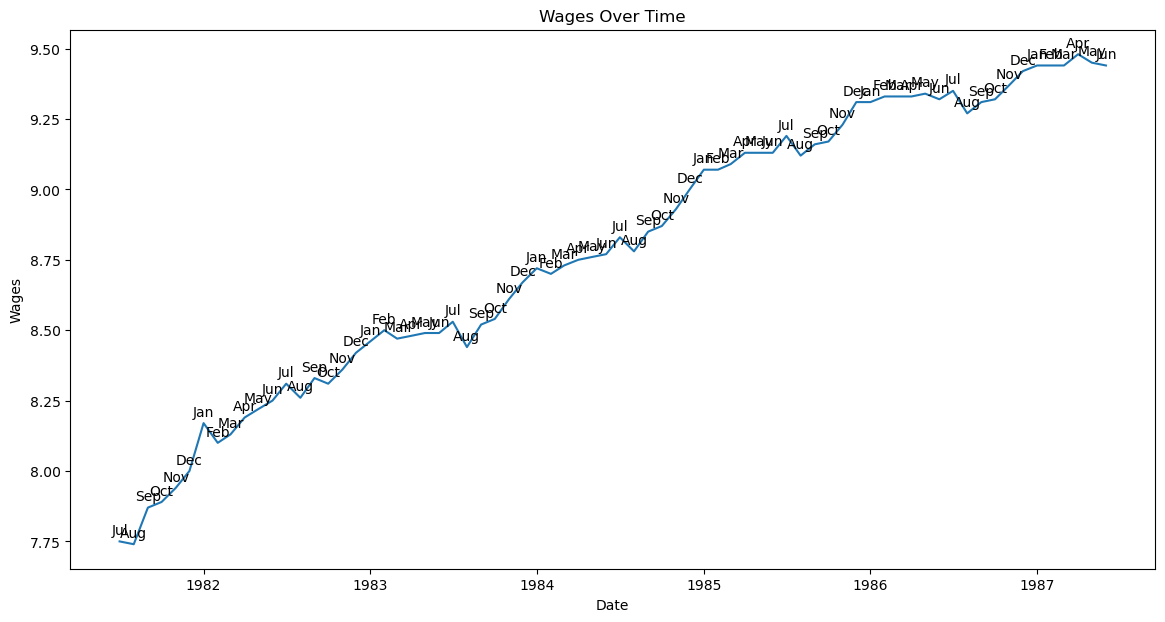

In [6]:
plt.figure(figsize=(14, 7))

plt.plot(df["time"], df["wages"])

plt.xlabel('Date')
plt.ylabel('Wages')
plt.title('Wages Over Time')

for index, row in df.iterrows():
    plt.annotate(row['time'].strftime('%b'), (row['time'], row['wages']), textcoords="offset points", xytext=(0,5), ha='center')


plt.show()

## (b) Use least squares to fit a linear time trend to this time series. Interpret the regression output. Save the standardized residuals from the fit for further analysis

In [7]:
n = len(df)

# Add a constant to the time values to fit an intercept
X = sm.add_constant(np.arange(1, n+1))

# Fit a linear regression model
model = sm.OLS(df["wages"], X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  wages   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     2503.
Date:                Fri, 22 Sep 2023   Prob (F-statistic):           1.58e-56
Time:                        14:02:04   Log-Likelihood:                 78.429
No. Observations:                  72   AIC:                            -152.9
Df Residuals:                      70   BIC:                            -148.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.9314      0.020    403.314      0.0

## (c) Construct and interpret the time series plot of the standardized residuals from part (b).

In [8]:
print("Residual standard error: ", np.std(model.resid, ddof=2))

Residual standard error:  0.08256676993858092


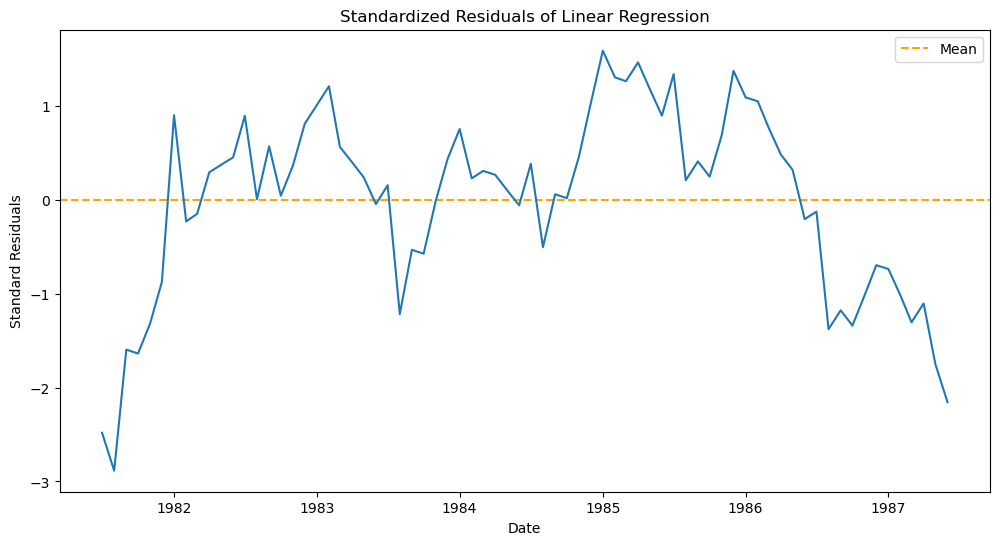

In [9]:
plt.figure(figsize=(12, 6))
ax = plt.subplot()

standardized_residuals = model.resid / np.std(model.resid, ddof=2)
plt.axhline(np.mean(standardized_residuals), color='orange', linestyle='--', label="Mean")
ax.plot(df["time"], standardized_residuals)

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Standard Residuals')
ax.set_title('Standardized Residuals of Linear Regression')
ax.legend()

plt.show()

## (d) Use least squares to fit a quadratic time trend to the wages time series. Interpret the regression output. Save the standardized residuals from the fit for further analysis.

In [10]:
# Number of data points
n = len(df)

# First-order term
x = np.arange(1, n+1)

# Second-order term
x_squared = x ** 2

# Add a constant to the time values to fit an intercept
X = sm.add_constant(np.column_stack((x, x_squared)))

# Fit a linear regression model
model = sm.OLS(df["wages"], X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  wages   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     2494.
Date:                Fri, 22 Sep 2023   Prob (F-statistic):           4.53e-65
Time:                        14:02:05   Log-Likelihood:                 103.27
No. Observations:                  72   AIC:                            -200.5
Df Residuals:                      69   BIC:                            -193.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.7974      0.021    364.127      0.0

## (e) Construct and interpret the time series plot of the standardized residuals from part (d).

In [11]:
print("Residual standard error: ", np.std(model.resid, ddof=3))

Residual standard error:  0.058893399895166294


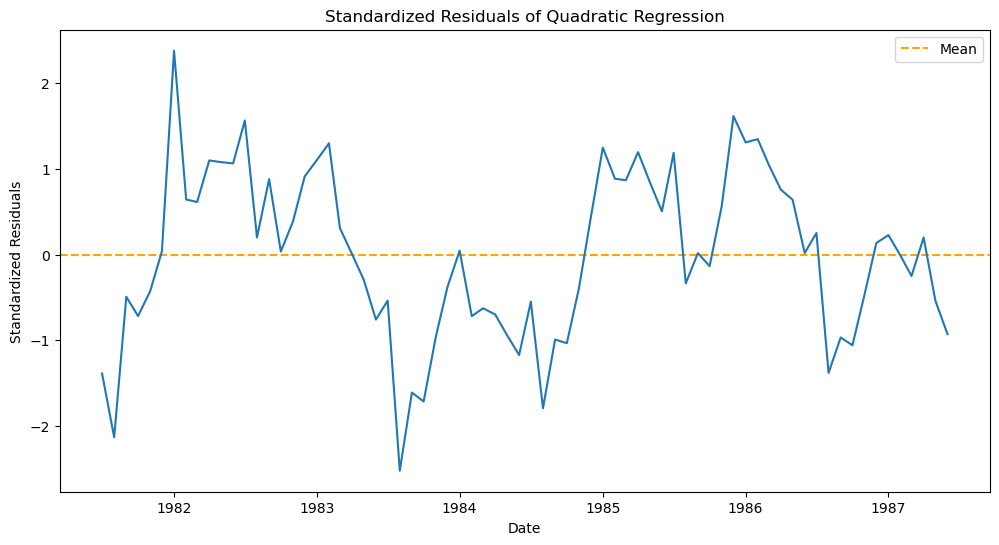

In [12]:
plt.figure(figsize=(12, 6))
ax = plt.subplot()

standardized_residuals = model.resid / np.std(model.resid, ddof=3)
plt.axhline(np.mean(standardized_residuals), color='orange', linestyle='--', label="Mean")
ax.plot(df["time"], standardized_residuals)

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Standardized Residuals')
ax.set_title('Standardized Residuals of Quadratic Regression')
ax.legend()

plt.show()

## (f) Consider the residuals from the least squares fit of a quadratic time trend

In [13]:
# no op

## (g) Perform the runs test on the standardized residuals and interpret the results.

In [14]:
def runs_test(x):
    n = len(x)
    values = np.array(x)
    median = np.median(values)
    num_above = np.sum((values > median).astype(int))
    num_below = np.sum((values < median).astype(int))
    num_runs = np.sum((np.diff(np.sign(values - median)) != 0).astype(int)) + 1

    expected_runs = (2 * num_above * num_below) / n + 1
    variance = (expected_runs - 1) * (expected_runs - 2) / (n - 1)

    z_score = (num_runs - expected_runs) / np.sqrt(variance)
    p_value = 2 * stats.norm.sf(np.abs(z_score))

    return {
        "number of runs": num_runs,
        "expected number of runs": expected_runs,
        "z-score": z_score,
        "p-value": p_value,
    }

In [15]:
runs_test(standardized_residuals)

{'number of runs': 15,
 'expected number of runs': 37.0,
 'z-score': -5.222357309971798,
 'p-value': 1.7665967407008796e-07}

## (h) Calculate and interpret the sample autocorrelations for the standardized residuals.

In [16]:
def acf(x):
    n = len(x)
    values = np.array(x)
    sample_mean = np.mean(values)
    sum_of_squares = np.sum((values - sample_mean) ** 2)

    r = []
    for k in range(1, n):
        # rk = 0
        # for t in range(k, n):
        #     rk += (values[t] - sample_mean) * (values[t-k] - sample_mean)
        rk = np.sum((values[k:] - sample_mean) * (values[:-k] - sample_mean))
        r.append(rk / sum_of_squares)

    return r

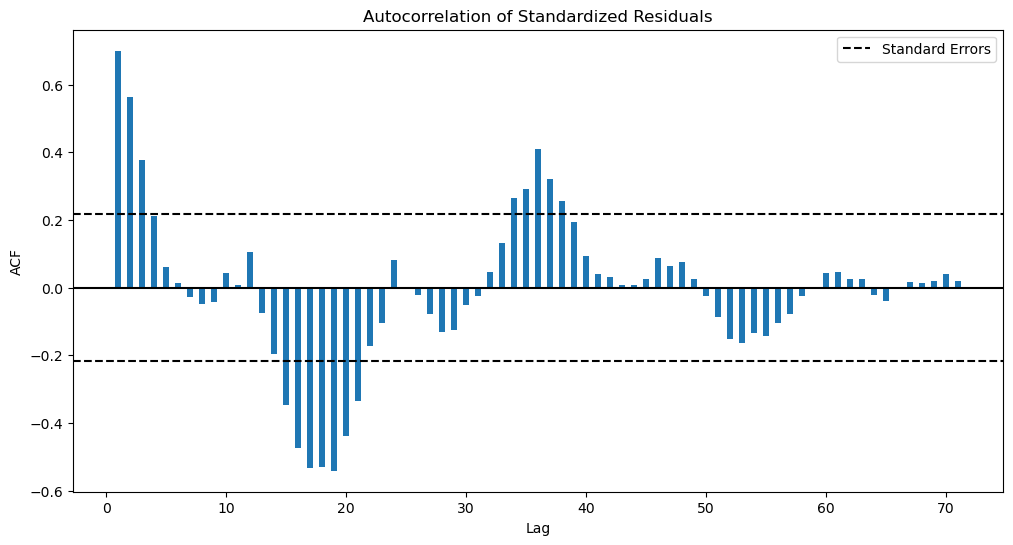

In [17]:
lags = np.arange(1, n)

acf_values = acf(standardized_residuals)
std_acf_values = np.std(acf_values)

plt.figure(figsize=(12, 6))
plt.bar(lags, acf_values, width=0.5)
plt.axhline(0, color='black')
plt.axhline(std_acf_values, color='black', linestyle='--', label="Standard Errors")
plt.axhline(-std_acf_values, color='black', linestyle='--')
plt.title('Autocorrelation of Standardized Residuals')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.legend()
plt.show()

## (i) Investigate the normality of the standardized residuals (error terms). Consider histograms and normal probability plots. Interpret the plots.

Text(0, 0.5, 'Sample Quantiles')

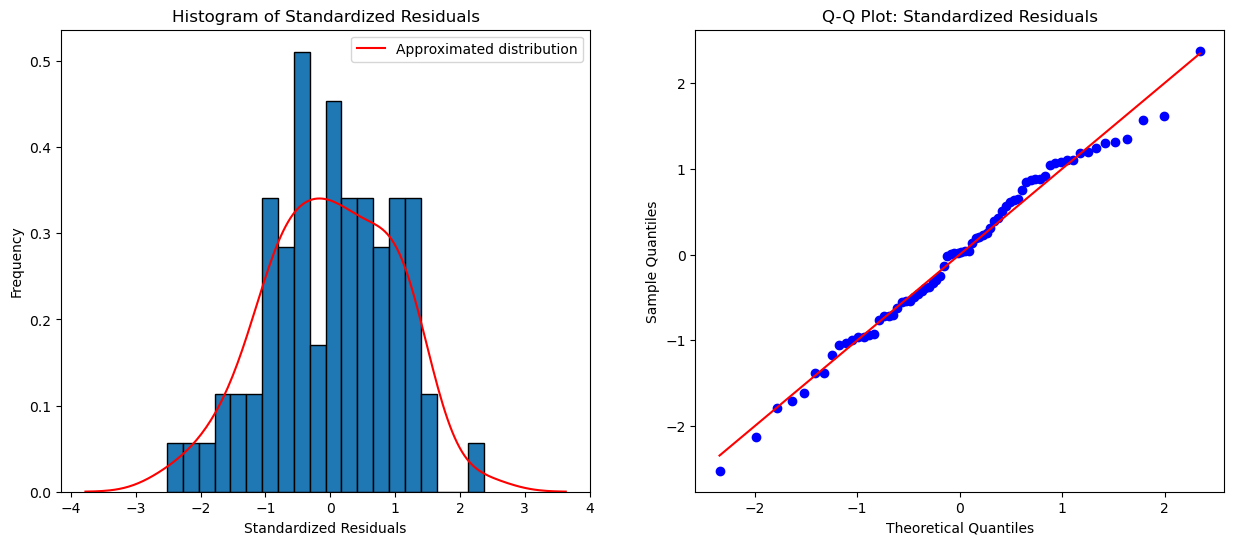

In [18]:
# Set up the figure and axes
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

ax[0].hist(standardized_residuals, bins=20, edgecolor='k', density=True)
sns.kdeplot(standardized_residuals, color='red', label="Approximated distribution", ax=ax[0])
ax[0].set_title('Histogram of Standardized Residuals')
ax[0].set_xlabel('Standardized Residuals')
ax[0].set_ylabel('Frequency')
ax[0].legend()

# Plot the QQ-plot (Normal probability plot)
stats.probplot(standardized_residuals, plot=ax[1])
ax[1].set_title('Q-Q Plot: Standardized Residuals')
ax[1].set_xlabel('Theoretical Quantiles')
ax[1].set_ylabel('Sample Quantiles')